In [62]:
import json
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import math

In [39]:
with open('weight.json') as file:
    jsondata = json.load(file)

In [40]:
jsondata

{'xlabel': 'age',
 'ylabel': 'weight',
 'is_adult': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,

In [44]:
data = pd.DataFrame([jsondata['x'], jsondata['y'], jsondata['is_adult']]).T
data.columns = ['x', 'y', 'is_adult']
data.head()

,x,y,is_adult
0,3.000000,48.766263,0.0
1,3.389558,29.945973,0.0
2,3.779116,49.316562,0.0
3,4.168675,41.663606,0.0
4,4.558233,57.909618,0.0


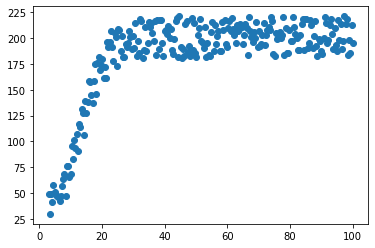

In [45]:
plt.scatter(data['x'], data['y'])

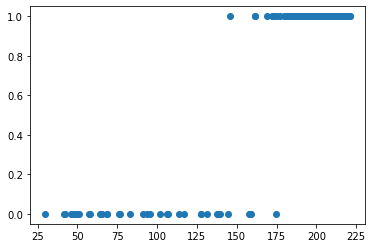

In [17]:
plt.scatter(data['y'], data['is_adult'])

In [138]:
# Linear Function
# Parameters:
#  x -- The float x-value to calculate f(x) from
#  p -- An Array of 2 values: p[0] = m (slope). p[1] = b (intercept)
# Returns: A float f(x) value for the function y = mx+b
def lin_f(x, p):
    return p[0] * x + p[1]

# Logistic Function
# Parameters:
#  x -- The float x-value to calculate f(x) from
#  p -- An Array of 4 values: p[0] = A. p[1] = w. p[2] = x0. p[3] = S (intercept)
# Returns: A float f(x) value for the general logistic function y = A / (1 + exp(-(x - x0)/w)) + S
def log_f(x, p):
    try:
        result = (p[0] / (1 + math.exp(-(x - p[2])/p[1]))) + p[3]
    except OverflowError:
        # If the math.exp function has an overflow, then that whole first term is going to 0
        result = p[3]
    return result

# Function to minimize: Calculate least squares distance (y-distance for simplicity) between actual points and their 
#  corresponding points on the line
# Parameters:
#  p -- Array that contains the arguments needed for the function. p[0] is x, p[1:] represents all other arguments. Refer to each function to see what those are
#  point_x -- The x-values for the training data points. Array of floating point numbers
#  point_y -- The y-values for the training data points. Array of floating point numbers
#  f_name -- The String name of the generalized function being called. MUST be the name of a function in this file. Examples are 'lin_f' and 'log_f'
# Returns: The sum of the squared distances for each training point
def min_squares_f(p, point_x, point_y, f_name):
    m, b = p[0], p[1]
    y = [globals()[f_name](i, p) for i in point_x]
    distance = [point_y[i] - y[i] for i in range(len(y))]
    return sum([d**2 for d in distance])

In [143]:
lin_min = minimize(min_squares_f, [1, 1], args=(data[data['x'] < 18]['x'], data[data['x'] < 18]['y'], 'lin_f'), method='Nelder-Mead', tol=1e-5)
lin_min

 final_simplex: (array([[ 8.87606097, -1.6312581 ],
       [ 8.8760618 , -1.63126361],
       [ 8.87606056, -1.63125261]]), array([5509.28267661, 5509.28267662, 5509.28267662]))
           fun: 5509.282676614779
       message: 'Optimization terminated successfully.'
          nfev: 147
           nit: 77
        status: 0
       success: True
             x: array([ 8.87606097, -1.6312581 ])

In [144]:
params = lin_min.x
params

array([ 8.87606097, -1.6312581 ])

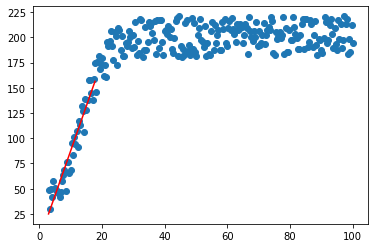

In [145]:
plt.scatter(data['x'], data['y'])
x = np.linspace(min(data[data['x'] < 18]['x']),max(data[data['x'] < 18]['x']),100)
y = params[0]*x+params[1]
plt.plot(x, y, '-r')
plt.savefig('linear_regression.png')

In [146]:
log_min = minimize(min_squares_f, [1, 1, 1, 1], args=(data['x'], data['y'], 'log_f'), method='Nelder-Mead', tol=1e-5)
log_min

 final_simplex: (array([[ 1842.42571061,     9.88456044,   -17.83525998, -1638.02085327],
       [ 1842.42576081,     9.88455955,   -17.83525793, -1638.02090075],
       [ 1842.42578495,     9.88456042,   -17.83525967, -1638.02092056],
       [ 1842.42576381,     9.88455838,   -17.83525473, -1638.02090713],
       [ 1842.42574878,     9.88456087,   -17.83526031, -1638.02088737]]), array([49294.88680429, 49294.8868043 , 49294.8868043 , 49294.8868043 ,
       49294.8868043 ]))
           fun: 49294.886804292444
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 800
           nit: 466
        status: 1
       success: False
             x: array([ 1842.42571061,     9.88456044,   -17.83525998, -1638.02085327])

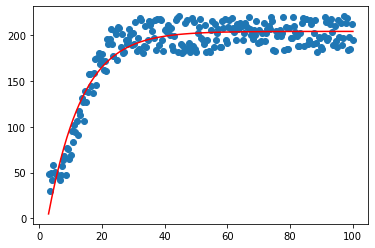

In [147]:
params = log_min.x
plt.scatter(data['x'], data['y'])
x = np.linspace(min(data['x']),max(data['x']),100)
y = [(params[0] / (1 + math.exp(-(i - params[2])/params[1]))) + params[3] for i in x]
plt.plot(x, y, '-r')
plt.savefig('logistic_regression.png')

In [148]:
# For this, adjusting the starting parameters helps a lot when generating the sigmoid
# For simplicity, the classifications are done at plot-time
threshold = 0.5

log_min = minimize(min_squares_f, [1, 1, np.mean(data['y']), min(data['is_adult'])], args=(data['y'], data['is_adult'], 'log_f'), method='Nelder-Mead', tol=1e-5)
log_min

 final_simplex: (array([[9.93689585e-01, 2.54541544e-07, 1.58764875e+02, 1.59313910e-03],
       [9.93692549e-01, 2.00826107e-07, 1.58764869e+02, 1.59315463e-03],
       [9.93693798e-01, 7.72996905e-07, 1.58764868e+02, 1.59316006e-03],
       [9.93690582e-01, 4.47302649e-07, 1.58764884e+02, 1.59314164e-03],
       [9.93690938e-01, 8.16023914e-07, 1.58764884e+02, 1.59314276e-03]]), array([1.99217347, 1.99217347, 1.99217348, 1.99217348, 1.99217348]))
           fun: 1.9921734735925767
       message: 'Optimization terminated successfully.'
          nfev: 455
           nit: 259
        status: 0
       success: True
             x: array([9.93689585e-01, 2.54541544e-07, 1.58764875e+02, 1.59313910e-03])

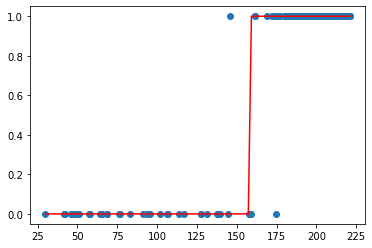

In [149]:
params = log_min.x
plt.scatter(data['y'], data['is_adult'])
x = np.linspace(min(data['y']),max(data['y']),100)
y = [0 if log_f(i, params) < threshold else 1 for i in x]
plt.plot(x, y, '-r')
plt.savefig('logistic_binary_regression.png')